# Decision tree
Goal of the excercise is to code selected part of the Decision tree algorithm which is focused on the optimum split part using gini index. After that the scikit-learn implementation of the Decision tree will be used.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Load the iris.csv dataset
- Take a look at the rows
- Label is the *species* column - how many unique labels do we have and how distributed?

In [3]:
df = pd.read_csv('iris.csv',sep=',') # Load the data
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


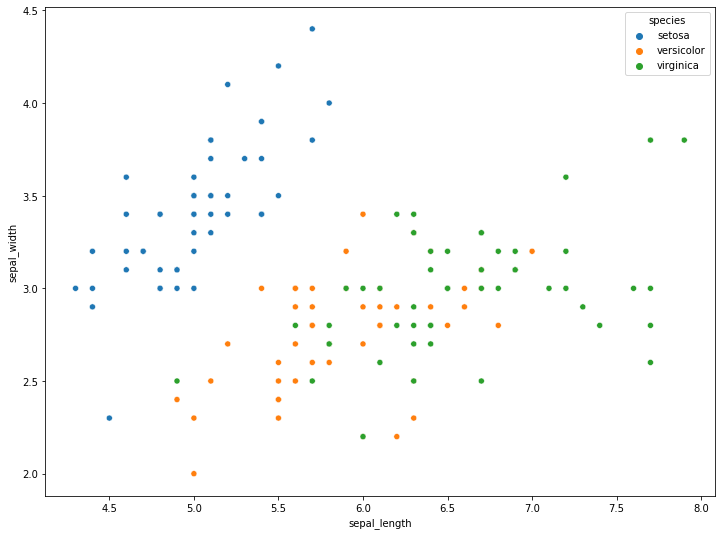

In [4]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(data = df, x='sepal_length', y='sepal_width', hue='species')

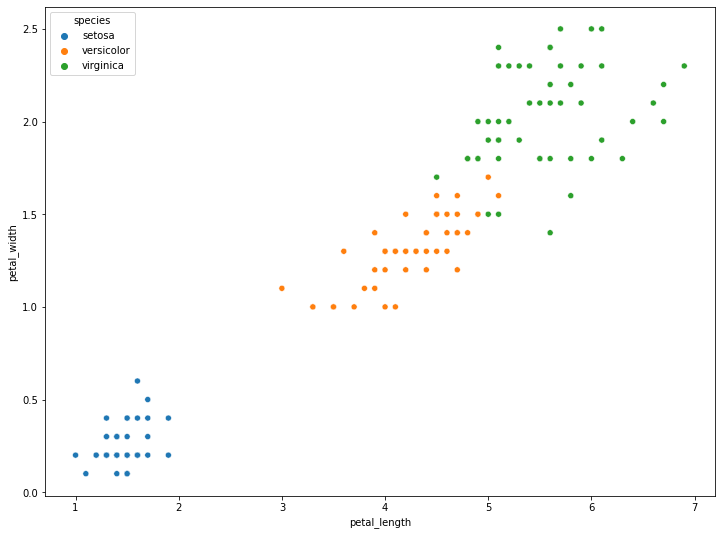

In [5]:
fig = plt.figure(figsize=(12,9))
sns.scatterplot(data = df, x='petal_length', y='petal_width', hue='species')

entropie, giniindex

### Compute the gini index for the whole data set
- Take a look at the slides on my Homel for the formulas and examples
- What is the minimum and maximum value for 2 classes? And for three?
- What result should we expect for the whole data set?

- Compute probability for every label in *species* attribute in the *data* parameter and use it in the Gini index formula

In [ ]:
def gini_index(data: pd.DataFrame):
    pass

In [ ]:
gini_index(df)

### Take only the *sepal_width* attribute
- Try to split the by attribute by value 3.35 (<= 3.35)
- Compute the gini index for the left and the right side of the split
    - Left: 0.629
    - Right: 0.285
- Compute the total gini impurity for this split
    - Total: 0.546
    
**How to solve the example?**
$$
Gini(left) = 1 - \left[ \left(\frac{45}{114}\right)^2 + \left(\frac{49}{114}\right)^2 + \left(\frac{20}{114}\right)^2 \right] = 0.629
$$

$$
Gini(right) = 1 - \left[ \left(\frac{5}{36}\right)^2 + \left(\frac{1}{36}\right)^2 + \left(\frac{30}{36}\right)^2 \right] = 0.285
$$

$$
GiniImpurity = \frac{|df_{left}|}{|df|} * Gini(left) + \frac{|df_{right}|}{|df|} * Gini(right) =  \frac{114}{150} * 0.629 + \frac{36}{150} * 0.285 = 0.546
$$


## Repeat the process for the all 4 attributes and find the best split and gini impurity for all of them
- You will try all the possible boundaries along all the features, i.e. all the axes petal width and sepal width.
    - How to set the boundary? 
        - Select only the unique values of the chosen attribute (.unique() function)
        - Sort the values (np.sort())
        - Iterate over the array of the values, take every two consecutive numbers and compute their mean
        - The mean is the current split boundary
- For each split the algorithm will compute the Gini impurity of the two groups created.
- Finally you will choose the decision boundary (best split) that gives the lowest Gini impurity for the two groups from all the 4 attbibutes

### Results:
- index = 0, Sepal Length < 5.45, Gini = 0.44
- index = 1, Sepal Width < 3.35, Gini = 0.54
- index = 2, Petal Length < 2.45, Gini = 0.33
- index = 3, Petal Width < 0.80, Gini = 0.33

- **Selected split:** index = 2, Petal Length < 2.45, Gini = 0.33 (... or index = 3, Petal Width < 0.80, Gini = 0.33)

## If we have only this one split - how will the classification rule-set look like?

In [ ]:
def print_splits(df: pd.DataFrame, column: str) -> None:
    pass

## sepal_length

In [ ]:
print_splits(df, 'sepal_length')

## sepal_width

In [ ]:
print_splits(df, 'sepal_width')

## petal_length

In [ ]:
print_splits(df, 'petal_length')

## petal_width

In [ ]:
print_splits(df, 'petal_width')

## Split the data using the selected split criterion (note: use the one using petal_length)
### Repeat the whole process one more time for the part of the data with more than 1 class
### Find the best split again
### Draw the decision tree with the two defined levels you have created this way - you can use any graphic editor you like, even the MS Paint :-)

In [ ]:
# Your code

# Introduction to the scikit-learn (Sklearn) library
Open source library for predictive data analysis. Contains algorithms for classification, clustering and others.

- Decision tree https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- Train test split https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- Accuracy https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [6]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Let's start with splitting the data into the input and output part
- Usually named as a *X* and *y* variables

In [7]:
x,y = df.drop('species',axis=1), df.species

In [8]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

## What is the size of our data?

In [10]:
x.shape, y.shape

((150, 4), (150,))

## There is a good practice to do evaluation process for every classification or regressions task.
- Do you know how to evaluate models?
- Do you know train test split method for evaluation? Do you know any different split method? How is it used?
- Do you know any different evaluation process?

## Lets continue with train test split process. Split dataset to train:test ratio 60:40. Check how many records/rows do you have in splitted variables.
- Note that number of rows in the *X* and *y* in the Train/Test part of the data has to be equal

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4, random_state=13)

## Take a look on data in variable y_test 
- Can you detect how many elements of each class is represented in test split?

In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((90, 4), (60, 4), (90,), (60,))

## Create the Decision tree classifier instance

In [13]:
clf = DecisionTreeClassifier()

### Use *fit()* method for training of classifier

In [14]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

### Lets use trained model for the prediction part
- Get predictions via the method *predict()*

In [15]:
y_pred = clf.predict(x_test)

### Can we evaluate our model? How good is it? What does accuracy mean?

In [17]:
y_pred
accuracy_score(y_test,y_pred)

0.9833333333333333

## How does the trained Decision tree look like?

### We can use either text representation as follows...

In [19]:
print(export_text(clf, show_weights=True, feature_names=list(x.columns.values)))

|--- petal_length <= 2.45
|   |--- weights: [31.00, 0.00, 0.00] class: setosa
|--- petal_length >  2.45
|   |--- petal_width <= 1.75
|   |   |--- petal_length <= 5.45
|   |   |   |--- sepal_length <= 4.95
|   |   |   |   |--- sepal_width <= 2.45
|   |   |   |   |   |--- weights: [0.00, 1.00, 0.00] class: versicolor
|   |   |   |   |--- sepal_width >  2.45
|   |   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: virginica
|   |   |   |--- sepal_length >  4.95
|   |   |   |   |--- petal_length <= 4.95
|   |   |   |   |   |--- weights: [0.00, 29.00, 0.00] class: versicolor
|   |   |   |   |--- petal_length >  4.95
|   |   |   |   |   |--- petal_width <= 1.55
|   |   |   |   |   |   |--- weights: [0.00, 0.00, 1.00] class: virginica
|   |   |   |   |   |--- petal_width >  1.55
|   |   |   |   |   |   |--- weights: [0.00, 2.00, 0.00] class: versicolor
|   |   |--- petal_length >  5.45
|   |   |   |--- weights: [0.00, 0.00, 1.00] class: virginica
|   |--- petal_width >  1.75
|   |   |--- w

### ...or more convinient graphical diagram :-)

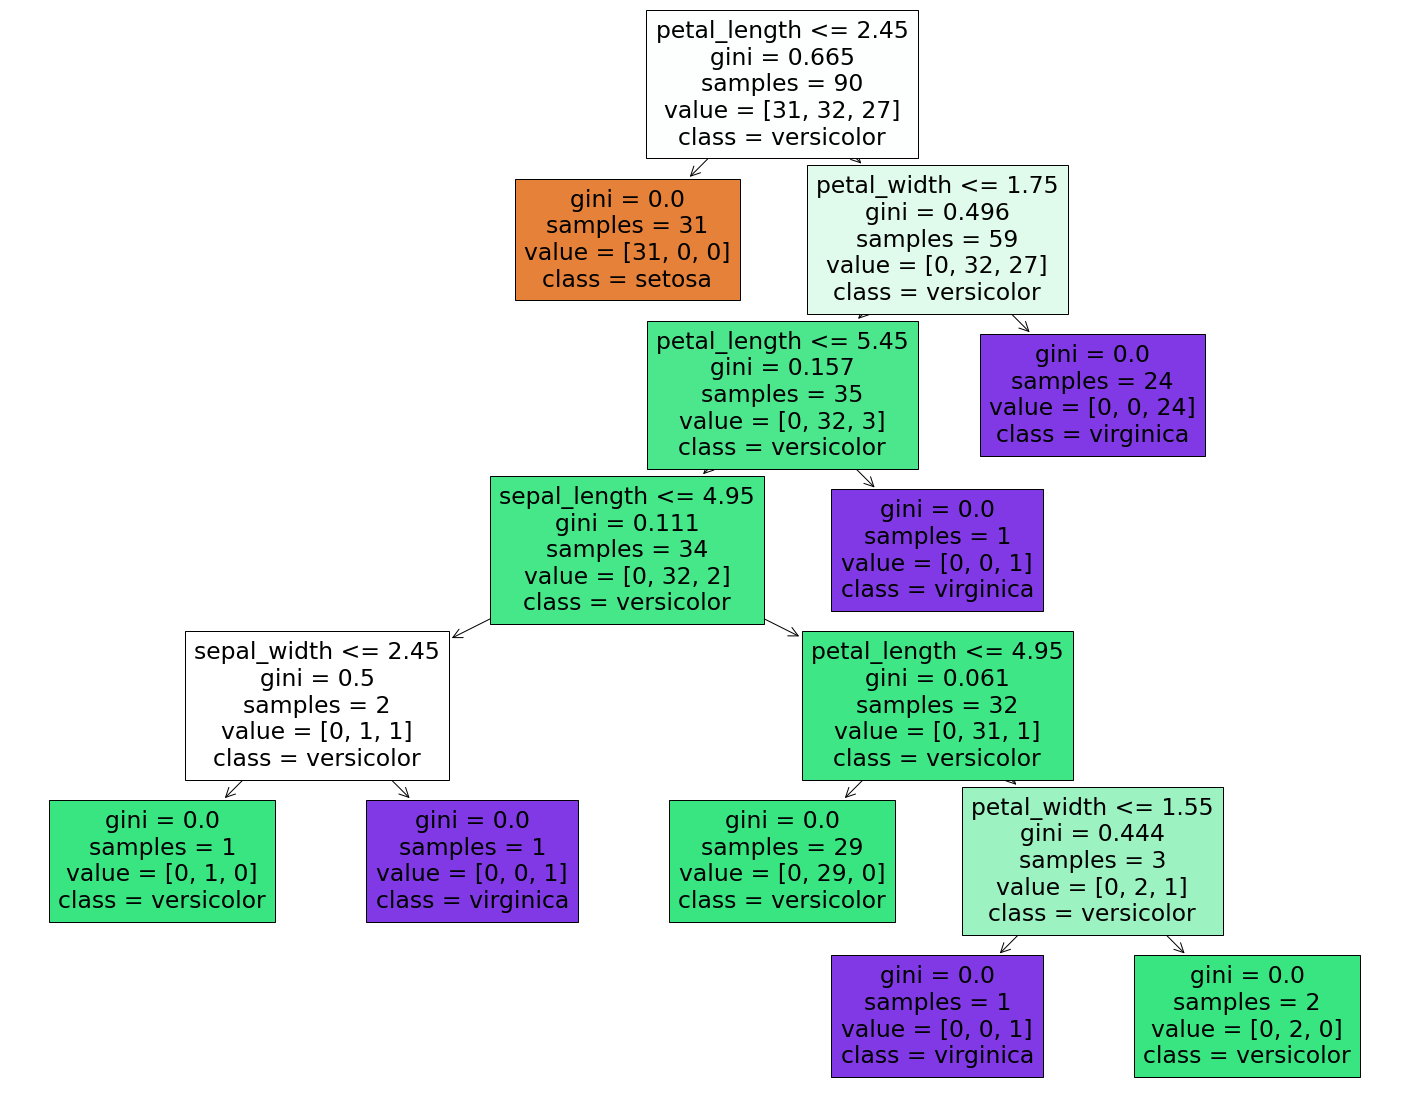

In [20]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, feature_names=list(x.columns.values), filled=True, class_names=clf.classes_)

# Task (2b)
- Finish the implementation task from the exercise 